# Practice Exercise - Linear Regression Assumptions and Statistical Inference

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset

In [6]:
# import the data
df = pd.read_csv("/content/drive/MyDrive/Python Course/Supervised Learning _ Foundations/Week 2 _ Linear Regression Assumptions and Statistical Inference/Week 2 _ Practice Exercise/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [7]:
df.shape

(506, 13)



*   The dataset has 506 rows and 13 columns



**Get the info regarding column datatypes**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB




*   The data contains only numerical columns: 10 float and 3 int



**Get summary statistics for the numerical columns**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000




*   MEDV ranges from 5 to 50 and has an average value of 22.5 and a median value of 21.2
*   The average CRIM is 3.61
*   The average AGE is about 68.6





**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [12]:
df["CHAS"] = df["CHAS"].replace({1: "yes", 0: "no"}) # replace the 1 values with 'yes' and 0 values with 'no'
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [13]:
# splitting the data into the dependent and independent variables
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [14]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0


In [15]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

In [49]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [50]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           2.38e-83
Time:                        10:47:00   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0



*   The model explains 70.7% of the variance in the training set (from the value of R-squared)
*   Unit increase of the CRIM predictor variables results in a 0.1138 decrease of the target variable
*   The p-values corresponding INDUS and AGE suggest that they can be ignored in the model at a 5% level of significance



## Checking Linear Regression Assumptions

**Check the following Linear Regression assumptions:**

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- Test for multicollinearity using VIF

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [52]:
checking_vif(X_train)

,feature,VIF
0,const,535.372593
1,CRIM,1.924114
2,ZN,2.743574
3,INDUS,3.999538
4,NX,4.396157
5,RM,1.860950
6,AGE,3.150170
7,DIS,4.355469
8,RAD,8.345247
9,TAX,10.191941


**Observations**

*   RAD and TAX show moderate to significant levels of multicollinearity (VIF greater than 5)




### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [53]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [54]:
# list of high VIF columns
col_list = ["RAD", "TAX"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,TAX,0.693267,4.997394
1,RAD,0.687451,5.044546




*   Dropping TAX has the less impact on Adj. R-squared, so we will drop TAX



In [84]:
col_to_drop = "TAX"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  TAX


,feature,VIF
0,const,532.025529
1,CRIM,1.923159
2,ZN,2.483399
3,INDUS,3.270983
4,NX,4.361847
5,RM,1.857918
6,AGE,3.149005
7,DIS,4.333734
8,RAD,2.942862
9,PTRATIO,1.909750




*   Each predictor variable now has a VIF less than 5



**Drop the high p-value variables**

In [85]:
# dropping INDUS and AGE since they have high p-values
X_train3 = X_train2
for value in ["INDUS","AGE"]:
    X_train3 = X_train3.loc[:, ~X_train3.columns.str.startswith(value)]
X_train3.head()

,const,CRIM,ZN,NX,RM,DIS,RAD,PTRATIO,LSTAT,CHAS_yes
13,1.0,0.62976,0.0,0.538,5.949,4.7075,4,21.0,8.26,0
61,1.0,0.17171,25.0,0.453,5.966,6.8185,8,19.7,14.44,0
377,1.0,9.82349,0.0,0.671,6.794,1.3580,24,20.2,21.24,0
39,1.0,0.02763,75.0,0.428,6.595,5.4011,3,18.3,4.32,0
365,1.0,4.55587,0.0,0.718,3.561,1.6132,24,20.2,7.12,0


**Create the model with the significant variables**

In [86]:
# creating model with the significant variables
model2 = sm.OLS(y_train, X_train3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     90.34
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           4.34e-85
Time:                        12:42:10   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     344   BIC:                             2190.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8196      6.092      8.014      0.0



*   Very slight reduction of Adj. R-squared
*   All the variables now significantly contribute to the target variable





### TEST FOR LINEARITY AND INDEPENDENCE

- Test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [87]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model2.fittedvalues.values  # predicted values
df_pred["Residuals"] = model2.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,20.4,19.428323,0.971677
1,16.0,17.881985,-1.881985
2,13.3,18.672515,-5.372515
3,30.8,31.377965,-0.577965
4,27.5,16.946181,10.553819


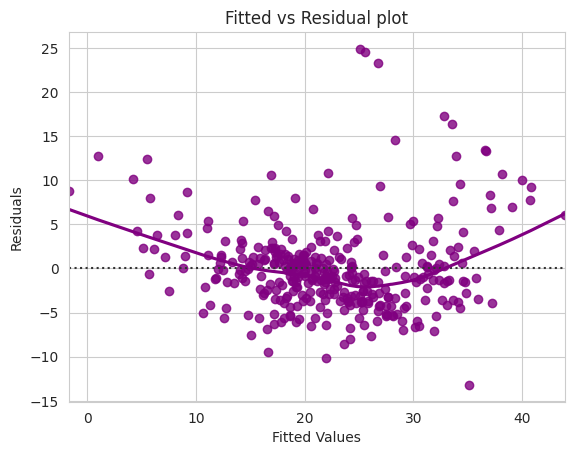

In [88]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

*   We can observe a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.



In [89]:

# creating dummy variables from original data
df2 = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

df2.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0


In [90]:
# columns in training set
X_train3.columns

Index(['const', 'CRIM', 'ZN', 'NX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT',
       'CHAS_yes'],
      dtype='object')

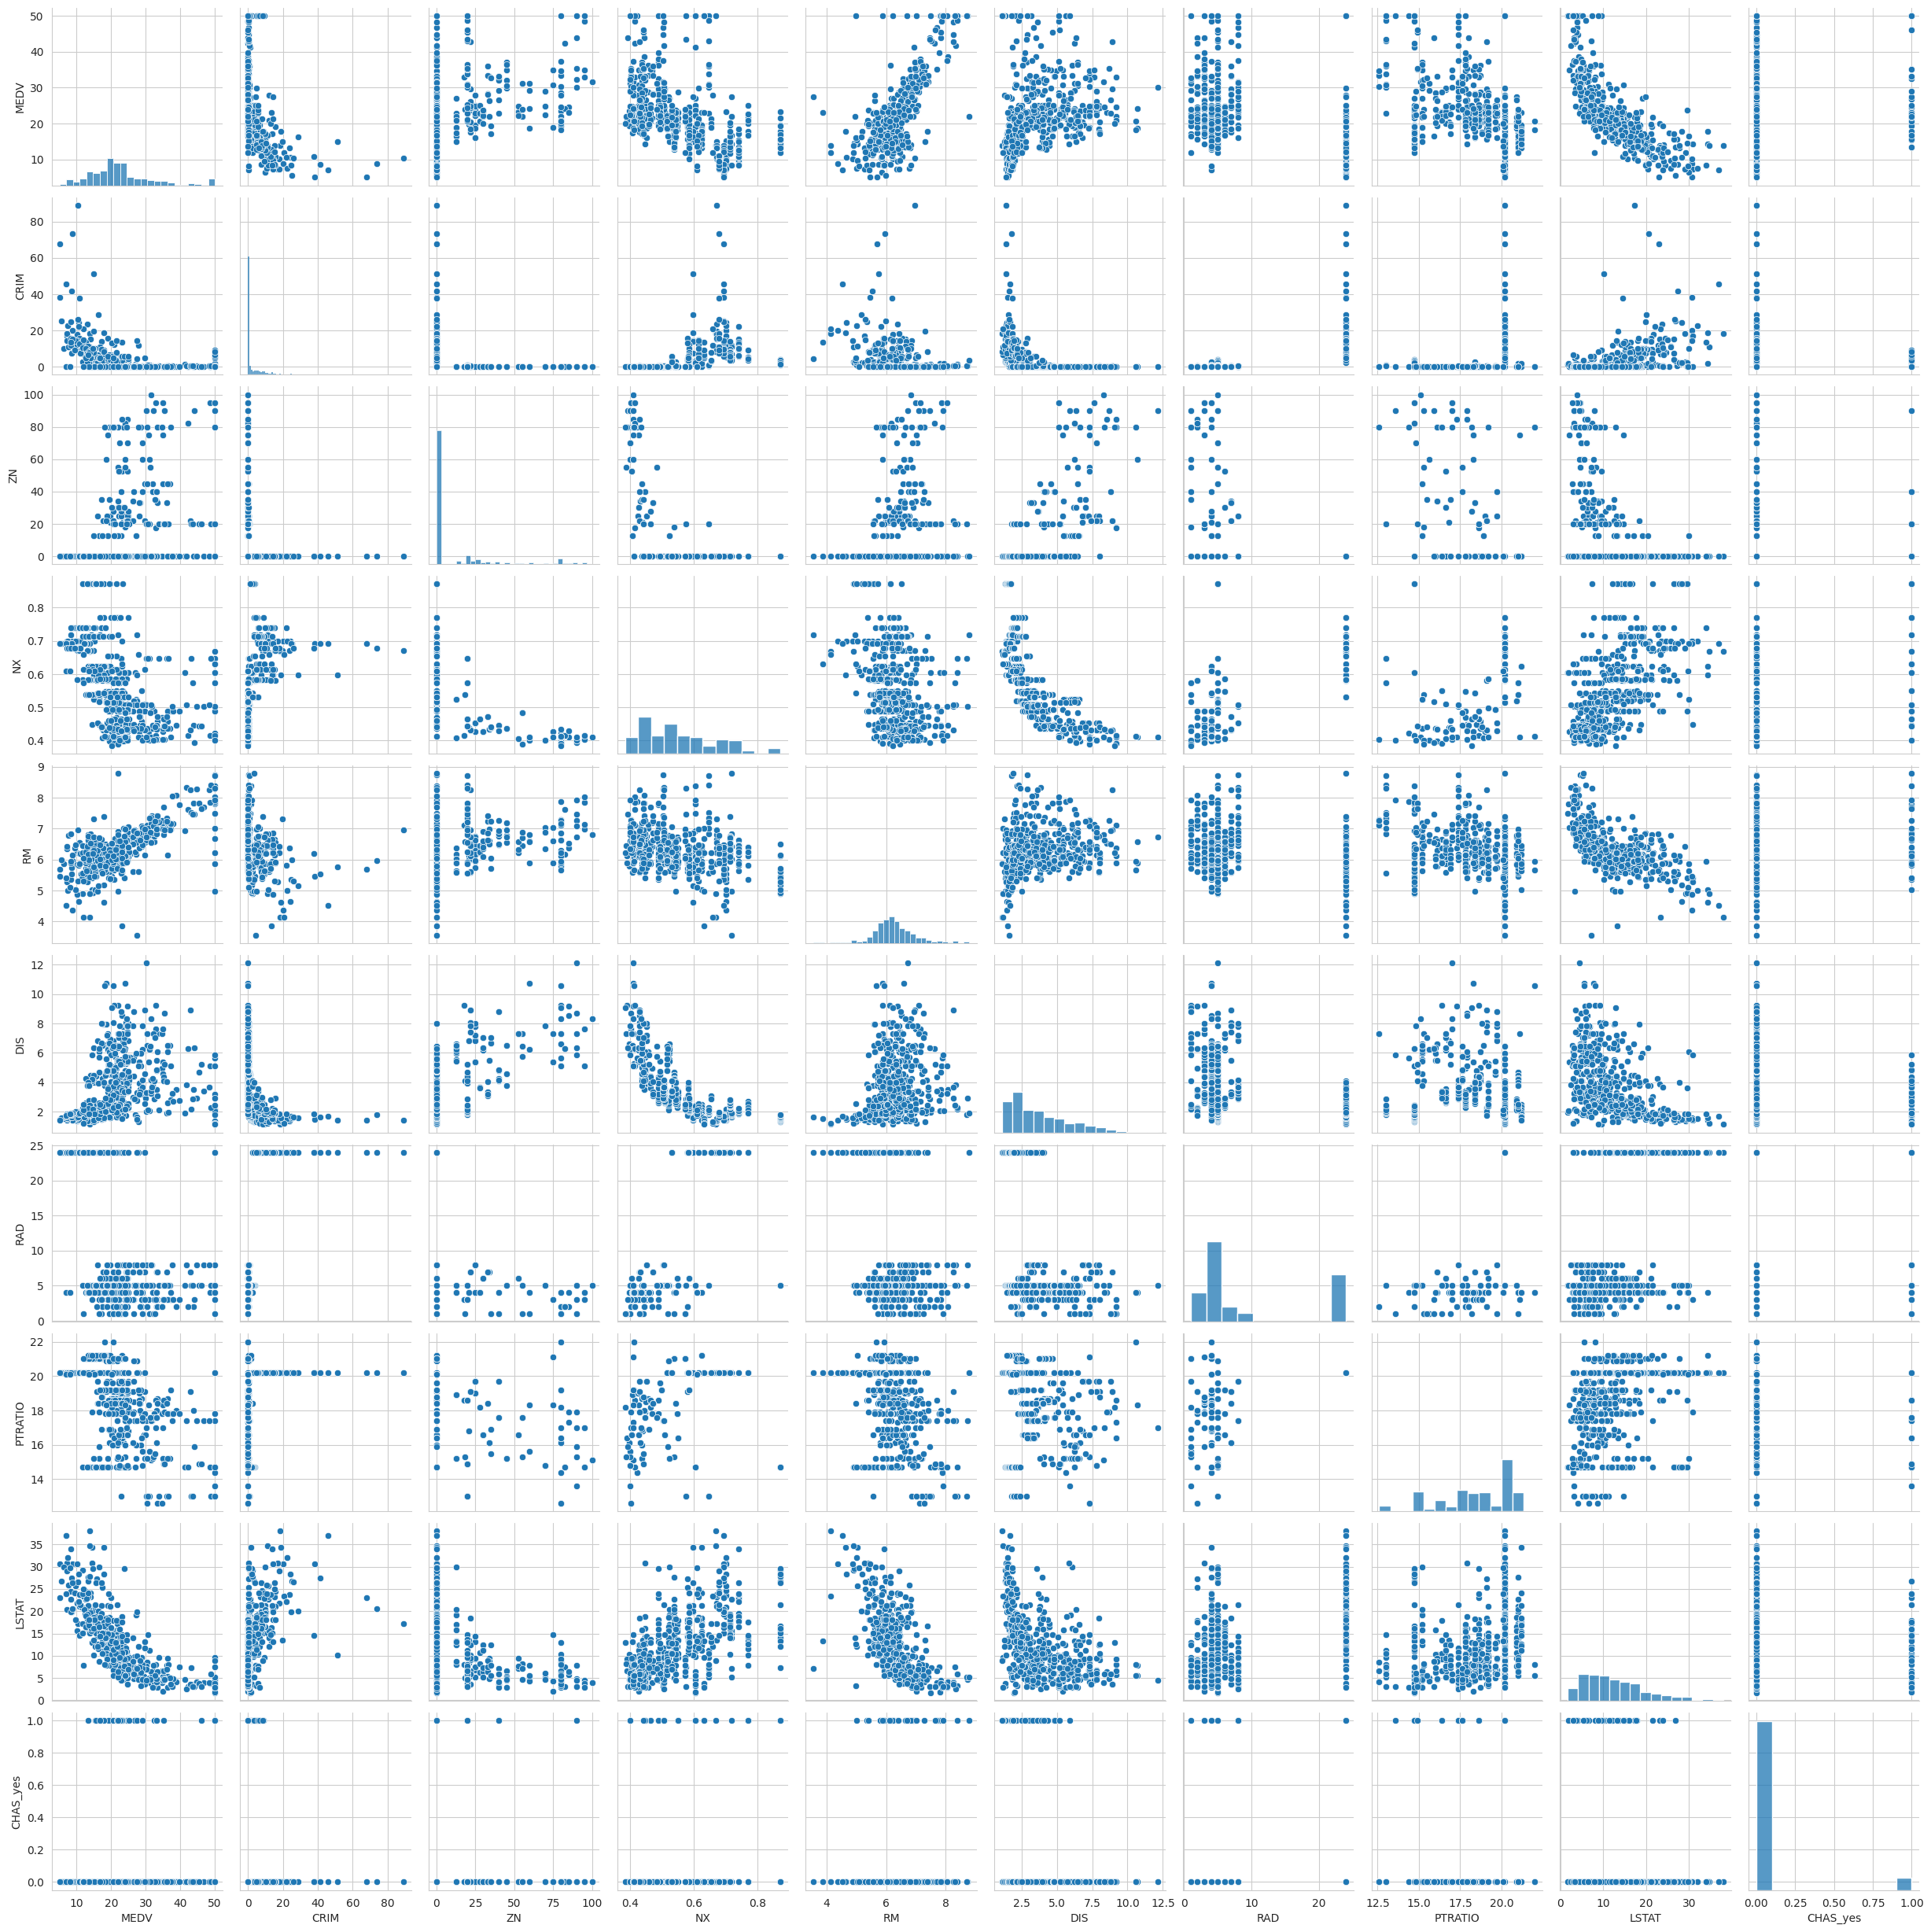

In [91]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(df2[['MEDV', 'CRIM', 'ZN', 'NX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT',
       'CHAS_yes']])
plt.show()



*   We see that the 'LSTAT' column has a slight nonlinear relationship with 'MEDV'. We can transform the 'LSTAT' column.



In [92]:
# using square transformation
X_train3["LSTAT_sq"] = np.square(X_train3["LSTAT"])

# let's create a model with the transformed data
model3 = sm.OLS(y_train, X_train3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          2.59e-100
Time:                        12:43:30   Log-Likelihood:                -1027.0
No. Observations:                 354   AIC:                             2076.
Df Residuals:                     343   BIC:                             2119.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.6079      5.482      9.597      0.0



*   We observe that the adj. R-squared has increased. Let's check the residual plot again.



In [93]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model3.fittedvalues.values  # predicted values
df_pred["Residuals"] = model3.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,20.4,21.049528,-0.649528
1,16.0,15.843095,0.156905
2,13.3,16.922929,-3.622929
3,30.8,32.939685,-2.139685
4,27.5,20.918977,6.581023


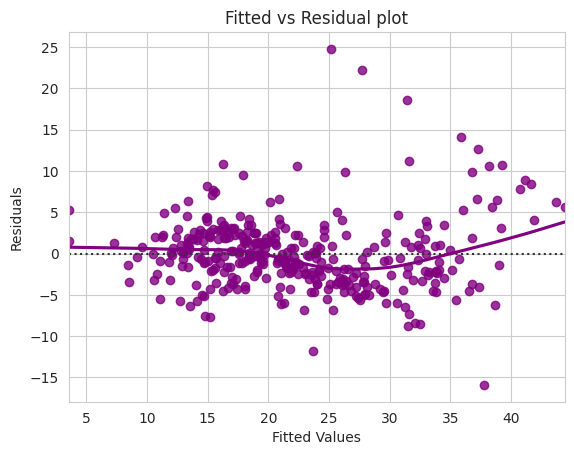

In [94]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We observe that the pattern has slightly decreased and the data points seems to be randomly distributed.

### TEST FOR NORMALITY

- Test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

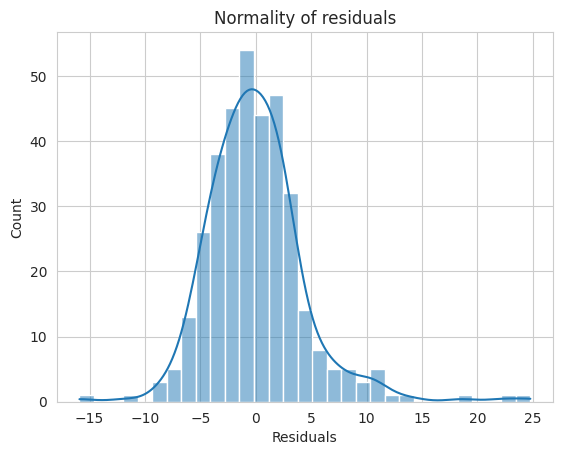

In [95]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

*   The residual terms are normally distributed.



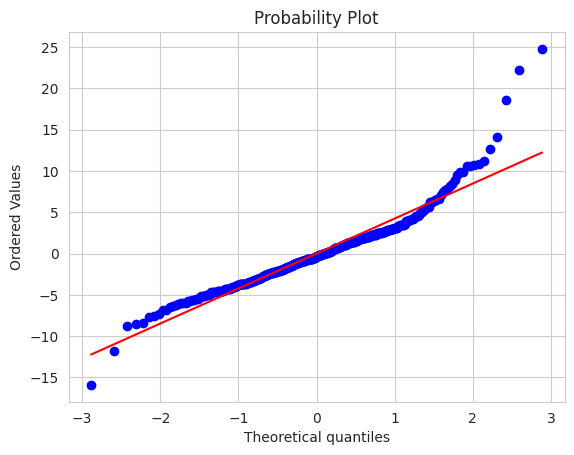

In [96]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

*   Most of the points are lying on the straight line in QQ plot


In [97]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9214760065078735, pvalue=1.1633760361312584e-12)

**Observations**

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

- Test for homoscedasticity by using the goldfeldquandt test
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [98]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0946874235933006), ('p-value', 0.28034099855662303)]

**Observations**

*   Since p-value > 0.05 we can say that the residuals are homoscedastic.



### Final Model and Summary

In [99]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          2.59e-100
Time:                        12:50:13   Log-Likelihood:                -1027.0
No. Observations:                 354   AIC:                             2076.
Df Residuals:                     343   BIC:                             2119.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.6079      5.482      9.597      0.0

### Draw inferences from the model

* R-squared of the model is 0.761 and adjusted R-squared is 0.754, which shows that the model is able to explain ~76% variance in the data. This is quite good.

* A unit increase in the per capita crime rate by town will result in a 0.1719 unit decrease in the median value of owner-occupied homes in 1000 dollars, all other variables remaining constant.

* The median value of owner-occupied homes in 1000 dollars of tracks bounding rivers will be 2.9374 units higher than those not bounding rivers, all other variables remaining constant.

### Predictions

### Let's print the linear regression equation.

In [100]:
# let's check the model parameters
model3.params

const       52.607921
CRIM        -0.171916
ZN           0.025705
NX         -17.269861
RM           2.235064
DIS         -1.334732
RAD          0.138144
PTRATIO     -0.821039
LSTAT       -1.798493
CHAS_yes     2.937385
LSTAT_sq     0.034776
dtype: float64

In [101]:
# Let us write the equation of linear regression
Equation = "MEDV ="
print(Equation, end=" ")
for i in range(len(X_train3.columns)):
    if i == 0:
        print(model3.params[i], "+", end=" ")
    elif i != len(X_train3.columns) - 1:
        print(
            model3.params[i],
            "* (",
            X_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(model3.params[i], "* (", X_train3.columns[i], ")")

MEDV = 52.60792068880113 + -0.17191556869532024 * ( CRIM ) +  0.02570471321862112 * ( ZN ) +  -17.26986081034166 * ( NX ) +  2.2350636949043414 * ( RM ) +  -1.3347321003441013 * ( DIS ) +  0.13814418423628602 * ( RAD ) +  -0.8210391183586992 * ( PTRATIO ) +  -1.7984932315990443 * ( LSTAT ) +  2.9373851631072316 * ( CHAS_yes ) +  0.034776452306730016 * ( LSTAT_sq )


### We can now use the model for making predictions on the test data.

In [102]:
X_train3.columns

Index(['const', 'CRIM', 'ZN', 'NX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT',
       'CHAS_yes', 'LSTAT_sq'],
      dtype='object')

In [103]:
 X_test.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'CHAS_yes'],
      dtype='object')

In [104]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["INDUS", "AGE", "TAX"], axis=1
)

In [106]:
# transforming the LSTAT column in the test data corresponding to the training set
X_test2["LSTAT_sq"] = np.square(X_test2["LSTAT"])

In [108]:
# let's make predictions on the test set
y_pred = model3.predict(X_test2)

In [109]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

4.402252192433672

In [110]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

4.320438751707732

In [111]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

3.152541163303393

In [112]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

3.3586380882652747

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict MEDV within a mean error of 3.36 units on the test data.
* Hence, we can conclude the model "model3" is good for prediction as well as inference purposes.